Null Values in each column:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Total Null Values:  7829


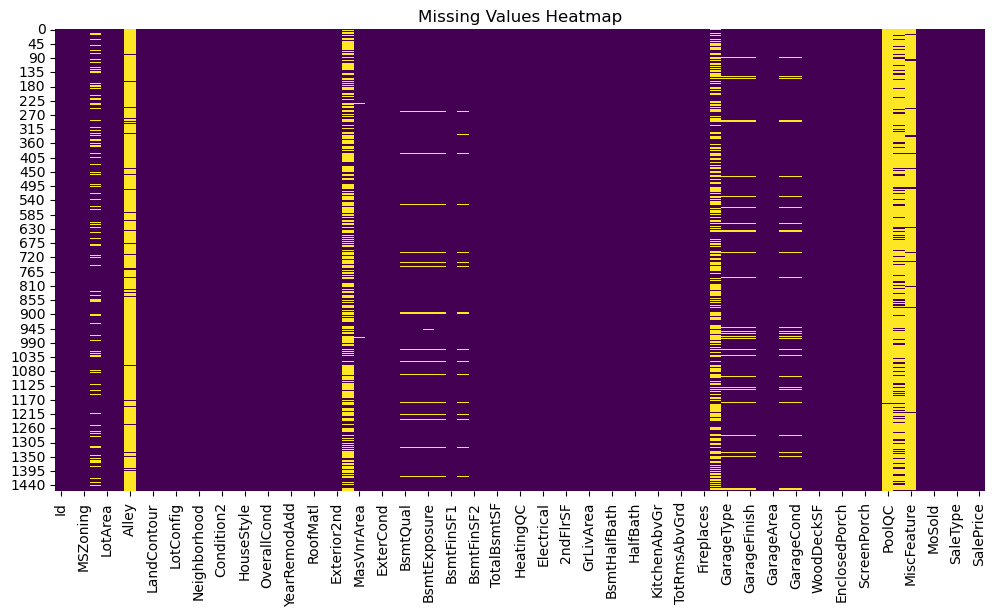

        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         0         65.0     8450       0     -1   
1        2          20         0         80.0     9600       0     -1   
2        3          60         0         68.0    11250       0     -1   
3        4          70         0         60.0     9550       0     -1   
4        5          60         0         84.0    14260       0     -1   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60         0         62.0     7917       0     -1   
1456  1457          20         0         85.0    13175       0     -1   
1457  1458          70         0         66.0     9042       0     -1   
1458  1459          20         0         68.0     9717       0     -1   
1459  1460          20         0         75.0     9937       0     -1   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0            0            0          0  ...        

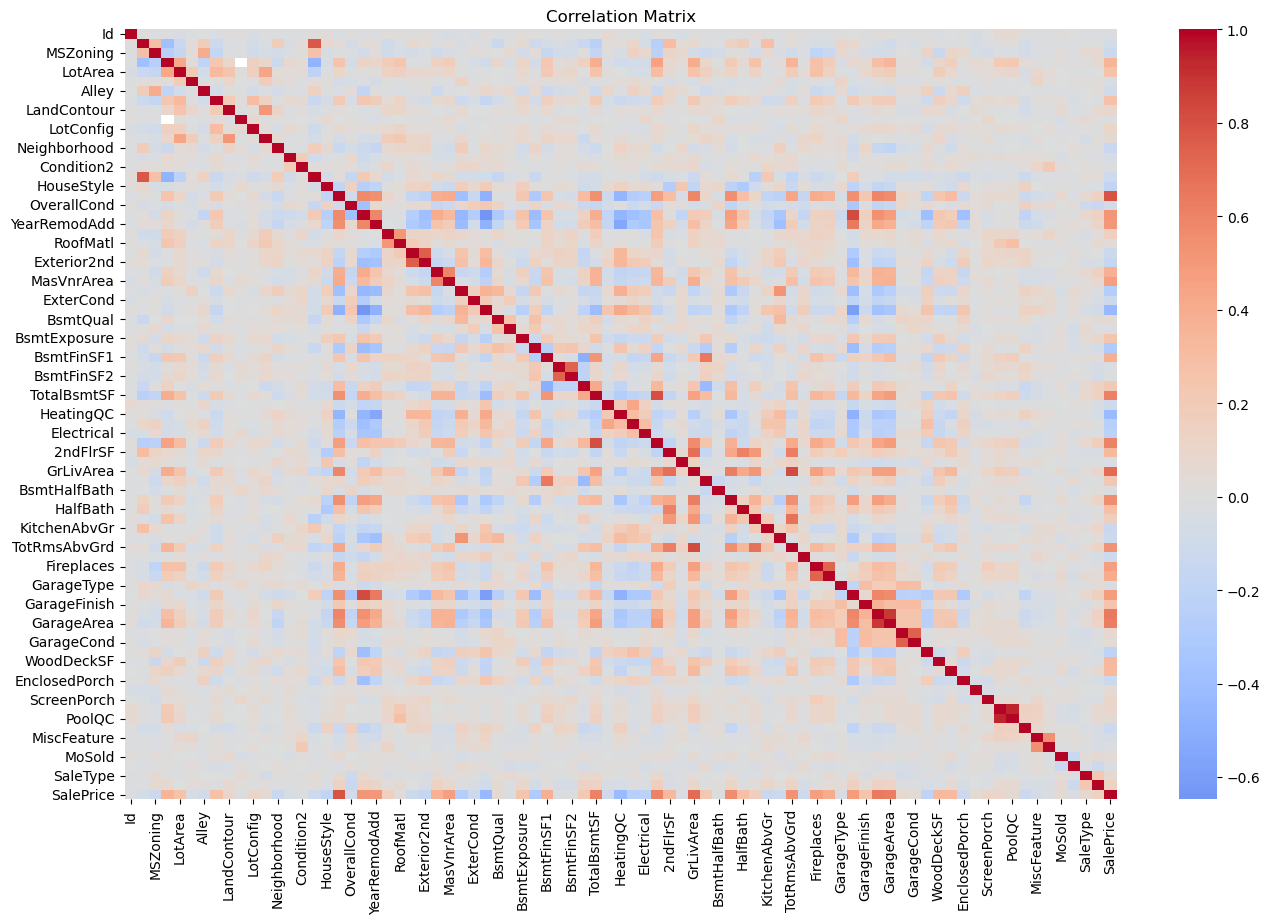


Top features correlated with SalePrice:
 BsmtFinType2    -0.023492
LowQualFinSF    -0.025606
YrSold          -0.028923
GarageType      -0.031803
Street          -0.041036
Condition1      -0.044820
MiscFeature     -0.061128
OverallCond     -0.077856
MSSubClass      -0.084284
Alley           -0.092607
Heating         -0.106673
Functional      -0.108367
BldgType        -0.112611
KitchenQual     -0.114746
MSZoning        -0.116047
Exterior1st     -0.120586
ExterCond       -0.121706
EnclosedPorch   -0.128578
Fence           -0.128700
KitchenAbvGr    -0.135907
Neighborhood    -0.143621
Exterior2nd     -0.164716
HouseStyle      -0.188688
PavedDrive      -0.208954
Electrical      -0.230830
CentralAir      -0.251328
ExterQual       -0.265015
BsmtFinType1    -0.299343
HeatingQC       -0.427649
Foundation      -0.429678
Name: SalePrice, dtype: float64


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Import the train.csv
train = pd.read_csv('train.csv')

# Step 2: Check for Null Values and analyze it
null_values = train.isnull().sum()
print("Null Values in each column:\n", null_values[null_values > 0])
print("\nTotal Null Values: ", null_values.sum())

# Analyze the missing data (optional visualization)
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Step 3: Integer mapping for each string-based feature
# Identify categorical variables
categorical_cols = train.select_dtypes(include=['object']).columns

# Integer mapping (using factorize for mapping)
for col in categorical_cols:
    train[col], _ = train[col].factorize()

print(train)
# Step 4: Checking correlation
# Correlation matrix
corr_matrix = train.corr()

# Visualizing the correlation matrix (optional)
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# If you want to see the top correlations with SalePrice
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False)
print("\nTop features correlated with SalePrice:\n", top_corr_features.tail(30))
